## INTRODUCCIÓN A LAS REDES NEURONALES

 Vamos a ver un ejemplo muy sencillo de red neuronal que averigüe el tipo de una flor. Utilizaremos un conjunto de datos que se llaman el <a href="https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris">Conjunto de datos flor iris.</a>

Para ello vamos a usar las siguientes variables de entrada:
 *   El largo de su sépalo: Medido en cm
 *   El largo de su pétalo: Medido en cm

 Pretendiendo distinguir entre los siguientes dos tipos de flores:
 *   Setosa
 *   Versicolor

La red neuronal lo único que va a hacer es "aprender" a crear una función matemática que dado el largo del sépalo y el largo del pétalo calcule el tipo de flor.

 Esta red neuronal, consta de una serie de neuronas que se pasan valores de unas a otras. Las neuronas se organiza en capas:

 *   Capa de entrada: Es una única capa por donde entran los datos de entrada. Es decir los valores del largo del sépalo y el largo del pétalo. Por lo tanto en este caso debe haber 2 neuronas , una por cada valor de entrada.
 *   Capas ocultas: Son varias capas, las cuales calculan de que tipo es cada flor. La primera capa oculta consta de 6 neuronas. La segunda capa oculta consta de 12 neuronas . La última capa oculta consta de 6 neuronas.
 *   Capa de salida: Es una única capa que es la que genera el resultado de la red neuronal. Como la red genera un único número la capa tiene solo 1 neurona.

#### Código completo:

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
# np.random.seed(5)
# tf.random.set_seed(5)
 
 
model = Sequential() # Modelo de Red Neuronal

model.add(Dense(6, activation='relu',input_dim=2)) # Primera capa con 6 neuronas que reciben el input de las 2 neuronas de input
model.add(Dense(12, activation='relu')) # Segunda capa con 12 neuronas
model.add(Dense(6, activation='relu'))  # Tercera capa con 6 neuronas
model.add(Dense(1, activation='sigmoid'))   # 1 Neurona de salida porque necesitamos un 0 o un 1

model.compile(loss='mean_squared_error')         
 
 
model.fit(x, y,epochs=40) 
 
 
print(model.predict([[4.9,1.4]]))
print(model.predict([[6.3,4.9]]))

Epoch 1/40
4/4 [==============================] - 1s 1ms/step - loss: 0.1988
Epoch 2/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1891
Epoch 3/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 4/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 5/40
4/4 [==============================] - 0s 3ms/step - loss: 0.1680
Epoch 6/40
4/4 [==============================] - 0s 3ms/step - loss: 0.1582
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1376
Epoch 9/40
4/4 [==============================] - 0s 3ms/step - loss: 0.1258
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1139
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.1046
Epoch 12/40
4/4 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 13/40
4/4 [==============================] - 0s 2ms/step - loss: 0.

In [4]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

# Multi-layer neural networks
inputs = Input(shape=(2,))
hidden1 = Dense(6, activation='relu')(inputs)
hidden2 = Dense(12, activation='relu')(hidden1)
hidden3 = Dense(6, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model2 = Model(inputs=inputs, outputs=output)

# Model summary
print(model2.summary())

# Plot model graph
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model.png')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 18        
                                                                 
 dense_9 (Dense)             (None, 12)                84        
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and install

#### GRÁFICAS

Gráfica con cada una de las flores de los datos:

Text(0, 0.5, 'Largo Pétalo')

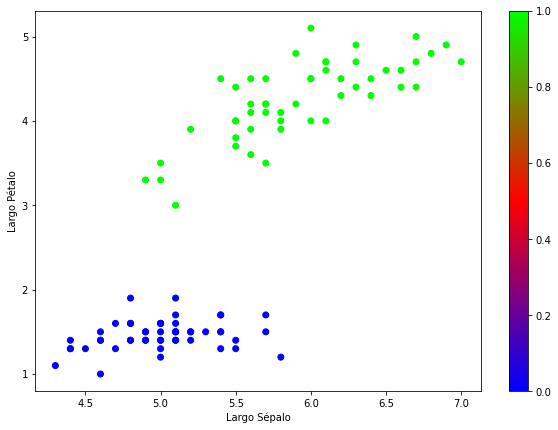

In [5]:
figure=plt.figure(figsize = (10, 7))
axes = figure.add_subplot()
 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.brg)
figure.colorbar(scatter,ax=axes)
axes.set_xlabel('Largo Sépalo')  
axes.set_ylabel('Largo Pétalo')

Gráfica con el resultado de la red neuronal:

In [10]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Text(0.5, 0, 'Tipo de flor')

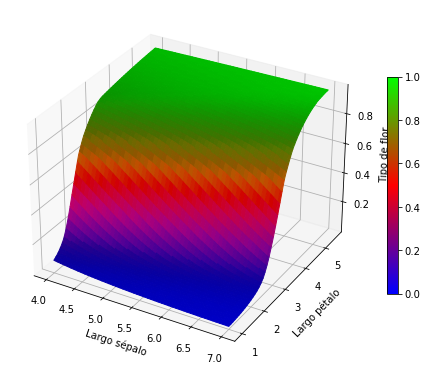

In [15]:
#   %matplotlib ipympl

figure=plt.figure(figsize=(8,8))
axes = figure.add_subplot(projection='3d')
  
xt=np.linspace(4,7,100)
yt=np.linspace(1,5.5,100)
xt,yt=np.meshgrid(xt,yt)
 
xa=xt.reshape(-1)
ya=yt.reshape(-1)
xya=np.column_stack((xa,ya))
 
za=model.predict([xya])
 
zt=np.reshape(za,xt.shape)
 
light_source = LightSource()
facecolors = light_source.shade(zt,plt.cm.brg, blend_mode='soft')
  
surface=axes.plot_surface(xt,yt,zt,facecolors=facecolors)
figure.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.brg),ax=axes, shrink = 0.5)
axes.set_xlabel('Largo sépalo')  
axes.set_ylabel('Largo pétalo')
axes.set_zlabel('Tipo de flor')


# EJERCICIOS:

#### 1.- Muestra los resultados para:
* un Largo de Sépalo de 5.4 y un Largo de Pétalo de 1.7
* un Largo de Sépalo de 5.5 y un Largo de Pétalo de 4.0

In [18]:
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))

[[0.07792273]]
[[0.93337315]]


#### 2.- Realiza los siguientes cambios en la red neuronal:
* No random seed.
* 2 épocas.
* Una red neuronal más pequeña:
    * La 1ª capa oculta con 4 neuronas en vez de 6
    * La 2ª capa oculta con 6 neuronas en vez de 12
    * La 3ª capa oculta con 4 neuronas en vez de 6
* Dibuja la red neuronal usando la web: <a href="http://alexlenail.me/NN-SVG/index.html">http://alexlenail.me/NN-SVG/index.html</a>

Muestra los resultados en la siguiente tabla:
|  **Largo Sépalo**  |  **Largo Pétalo**  |  **Resultado red neuronal Original**  |  **No random seed**  |  **2 épocas**  |  **Red neuronal pequeña**  |  **Tipo de Flor (0 o 1)**  |
| - | - | - | - | - | - | - |
|  5.4   |  1.7   |  0.07792273  |  0.00751775  |  0.00629899  |  0.00629899  |  0  |
|  5.5   |  4.0   |  0.93337315  |  0.99430776  |  0.9952785  |  0.9952785  |  1  |

In [29]:

np.random.seed(5)
tf.random.set_seed(5)

model.compile(loss='mean_squared_error')
model.fit(x,y,epochs=2)
print(model.predict([[5.4,1.7]]))
print(model.predict([[5.5,4.0]]))


Epoch 1/2
4/4 [==============================] - 0s 2ms/step - loss: 1.4657e-04
Epoch 2/2
4/4 [==============================] - 0s 1ms/step - loss: 1.1415e-04
[[0.00540667]]
[[0.9960086]]


In [32]:
modelo2ej = Sequential()

modelo2ej.add(Dense(4, activation="relu", input_dim=2))
modelo2ej.add(Dense(6, activation="relu"))
modelo2ej.add(Dense(4, activation="relu"))
modelo2ej.add(Dense(1, activation="sigmoid"))

modelo2ej.compile(loss='mean_squared_error')
modelo2ej.fit(x,y, epochs=40)
print(model2.predict([[5.4,1.7]]))
print(model2.predict([[5.5,4.0]]))

Epoch 1/40
4/4 [==============================] - 0s 3ms/step - loss: 0.2397
Epoch 2/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2380
Epoch 3/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 4/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2364
Epoch 5/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 6/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2351
Epoch 7/40
4/4 [==============================] - 0s 3ms/step - loss: 0.2345
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 9/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2334
Epoch 10/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2328
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 12/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2318
Epoch 13/40
4/4 [==============================] - 0s 2ms/step - loss: 0.

#### 3.- Modifica los datos:
* sepal_length=iris.data[:,0]
* petal_length=iris.data[:,2]
* flower_type=iris.target[:]
* Muestra la gráfica con cada una de las flores, con todos los datos.
* Prueba con los datos:
    * Largo Sépalo 6.9 y Largo Pétalo 5.1
    * Largo Sépalo 7.7 y Largo Pétalo 6.1

#### 4.- Modifica el programa creando una función compile_fit, que devuelva el objeto model, para que:
* pasemos el número de neuronas en cada capa
* cree, compile y entrene el modelo.

En nuestro ejemplo, sería, capas=[6,12,6,1]

Pueba con:
* capas_red2=[8,16,8,1]
* model2=compile_fit(capas_red2,x,y)

#### 5.- Muestra los resultados de llamar a la red neuronal con los valores (4.9, 1.4) y (6.3, 4.9), con las siguientes capas:
* Red1: 2,4,1
* Red2: 4,8,8,2,1
* Red3: 8,12,24,12,1
* Red4: 8,16,8,1
* Red5: 16,32,1

Crea un array llamado **redes** con las 5 redes.

Muestra los resultados:
<pre>
Red                 	Resultado 1	Resultado 2
[2, 4, 1]           	0.514202	0.514202
[4, 8, 8, 2, 1]     	0.312075	0.518122
[8, 12, 24, 12, 1]  	0.465371	0.952019
[8, 16, 8, 1]       	0.355907	0.721675
[16, 32, 1]         	0.056162	0.960450
</pre>

#### 6.- Modifica el ejercicio anterior para pasar en el array **redes** el número de épocas:
ejemplo: redes= [[2,4,1,30], [4,8,8,2,1,34], [8,12,24,12,1,40], [8,16,8,1,25], [16,32,1,20]]

El Tiempo es el tiempo que tarda el entrenamiento.

Mostramos:
<pre>
Red                 	Épocas	Resultado 1	Resultado 2	Tiempo (s)
[2, 4, 1]           	30	0.515647	0.512077	0.60
[4, 8, 8, 2, 1]     	34	0.351254	0.517159	0.71
[8, 12, 24, 12, 1]  	40	0.465371	0.952019	0.72
[8, 16, 8, 1]       	25	0.532426	0.763234	0.59
[16, 32, 1]         	20	0.212098	0.867664	0.47
</pre>

#### 7.- Gráficos:
Muestra para todos los tipos de flores, una gráfica de puntos en 4D que:
* El eje X será el largo del sépalo y pon eso como etiqueta del eje
* El eje Y será el largo del pétalo y pon eso como etiqueta del eje
* Añade los labels de cada uno de los tipos y que cada tipo de flor sea de un color distinto
* El eje Z es el valor del ancho del pétalo
* El tamaño de cada punto es el ancho del sépalo


#### 8.- Gráficos KDE:
4 subplots (2x2):
* largo del sépalo
* largo del pétalo
* ancho del sépalo
* ancho del pétalo